# Matrix multiplication from foundations

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data/"mnist.pkl.gz"

In [3]:
path_data

WindowsPath('data')

In [4]:
path_gz

WindowsPath('data/mnist.pkl.gz')

In [5]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [6]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

In [8]:
x_train[0].shape

(784,)

In [9]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [10]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [11]:
list(chunks(vals,5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [12]:
len(list(chunks(lst1, 28))[0]),len(list(chunks(lst1, 28))[1])

(28, 28)

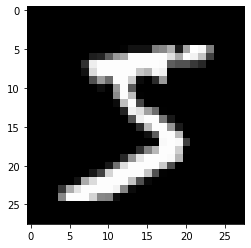

In [13]:
mpl.rcParams["image.cmap"] = "gray"
plt.imshow(list(chunks(lst1, 28)));

**islice**

Similar to chunks function

In [14]:
from itertools import islice

In [15]:
it = iter(vals)
islice(it, 5)

In [16]:
list(islice(it,5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [17]:
list(islice(it,5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [18]:
list(islice(it,5))

[]

In [19]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

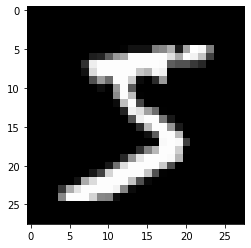

In [20]:
plt.imshow(img);

## Matrix and tensor

In [21]:
len(img), img[20][15]

(28, 0.98828125)

In [22]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [23]:
m = Matrix(img)
m[20,15]

0.98828125

In [24]:
import torch
from torch import tensor

In [25]:
tensor([1,2,3])

tensor([1, 2, 3])

In [26]:
type(x_train)

numpy.ndarray

In [27]:
# map numpy to tensor #
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid)) 

In [28]:
x_train.shape, x_train.type(), type(x_train), x_train.dtype

(torch.Size([50000, 784]), 'torch.FloatTensor', torch.Tensor, torch.float32)

In [29]:
x_train.shape, x_train.reshape(-1,28,28).shape, x_train.reshape((-1,28,28)).shape

(torch.Size([50000, 784]),
 torch.Size([50000, 28, 28]),
 torch.Size([50000, 28, 28]))

In [30]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

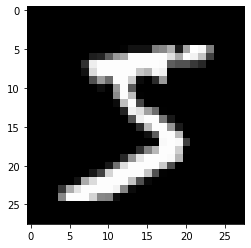

In [31]:
plt.imshow(imgs[0]);

In [32]:
imgs[0,20,15]

tensor(0.9883)

In [33]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [34]:
min(y_train), max(y_train), y_train.min(), y_train.max()

(tensor(0), tensor(9), tensor(0), tensor(9))

## Random numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

In [35]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [36]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [37]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [38]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [39]:
[print("yo") for _ in range(3)];

yo
yo
yo


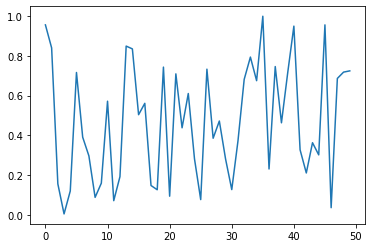

In [40]:
plt.plot([rand() for _ in range(50)]);

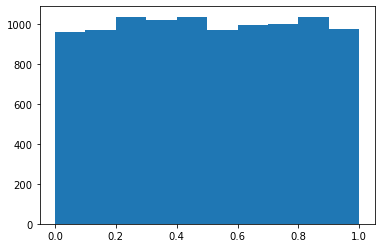

In [41]:
plt.hist([rand() for _ in range(10000)]);

In [42]:
chunks??

Signature: chunks(x, sz)
Docstring: <no docstring>
Source:   
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]
File:      d:\local disk(source)\coding\deep learning\fastai 22 stable diffusion\notebook recreated\<ipython-input-10-ebfe80a2facc>
Type:      function


In [43]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

12.7 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
%timeit -n 10 torch.randn(784,10)

The slowest run took 19.46 times longer than the fastest. This could mean that an intermediate result is being cached.
2.79 ms ± 4.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix multiplication

In [45]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [48]:
x_valid.shape

torch.Size([10000, 784])

In [49]:
m1 = x_valid[:5]
m2 = weights

In [50]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [51]:
ar, ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar, ac), (br, bc)

((5, 784), (784, 10))

In [52]:
t1 = torch.zeros(ar,bc)
t1.shape

torch.Size([5, 10])

In [53]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [54]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [55]:
t1.shape

torch.Size([5, 10])

In [56]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [57]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [58]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [62]:
%timeit _=matmul(m1, m2)

2.31 s ± 352 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
ar*bc*ac

39200

## Numba

In [64]:
from numba import njit

In [65]:
def dot(a,b):
    res = 0.
    for i in range(len(a)):
        res = res + a[i]*b[i]
    return res

In [66]:
from numpy import array

In [68]:
dot(array([1.,2,3]),array([2.,3,4]))

20.0

In [69]:
@njit
def dot2(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [70]:
dot2(array([1.,2,3]),array([2.,3,4]))

20.0

In [71]:
%time dot(array([1.,2,3]),array([2.,3,4]))

Wall time: 0 ns


20.0

In [72]:
%timeit dot(array([1.,2,3]),array([2.,3,4]))

7.11 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [73]:
%timeit dot(array([1.,2,3]),array([2.,3,4]))

7.06 µs ± 43.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [74]:
%timeit dot2(array([1.,2,3]),array([2.,3,4]))

5.32 µs ± 360 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [75]:
%timeit dot2(array([1.,2,3]),array([2.,3,4]))

5 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now only two of our loops are running in python, not three

In [76]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot2(a[i,:],b[:,j])
    return c

In [77]:
matmul(m1, m2)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at <ipython-input-69-4b06d91b5f0b> (3)[0m
[1m
File "<ipython-input-69-4b06d91b5f0b>", line 3:[0m
[1mdef dot2(a,b):
[1m    res = 0.
[0m    [1m^[0m[0m

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'torch.Tensor'>[0m
- argument 1: [1mCannot determine Numba type of <class 'torch.Tensor'>[0m


In [79]:
m1.dtype, type(m1)

(torch.float32, torch.Tensor)

In [82]:
type(m1.numpy())

numpy.ndarray

In [83]:
m1a,m2a = m1.numpy(), m2.numpy()

In [84]:
from fastcore.test import *

In [85]:
test_close??

Signature: test_close(a, b, eps=1e-05)
Source:   
def test_close(a,b,eps=1e-5):
    "`test` that `a` is within `eps` of `b`"
    test(a,b,partial(is_close,eps=eps),'close')
File:      c:\programdata\anaconda3\lib\site-packages\fastcore\test.py
Type:      function


In [87]:
matmul(m1a,m2a)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [88]:
test_close(t1,matmul(m1a,m2a))

In [89]:
%timeit -n 50 matmul(m1a,m2a)

1.3 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [90]:
%timeit -n 50 matmul(m1a,m2a)

1.14 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise ops